In [1]:
!git clone "https://github.com/VarshiniAG/ml-intern-assessment.git"


Cloning into 'ml-intern-assessment'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 127 (delta 39), reused 12 (delta 12), pack-reused 62 (from 1)
Receiving objects: 100% (127/127), 62.27 KiB | 2.22 MiB/s, done.
Resolving deltas: 100% (48/48), done.


In [5]:
!ls "ml-intern-assessment/AIML Intern Assignment"


 evaluation.md	 README.md  'src '  'tests '


In [8]:
import sys
sys.path.append("/content/ml-intern-assessment/AIML Intern Assignment/src ")

from attention import scaled_dot_product_attention
from utils import generate_sample_matrices, generate_mask

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from attention import scaled_dot_product_attention
from utils import generate_sample_matrices, generate_mask



In [11]:
# Create sample Q, K, V matrices
Q, K, V = generate_sample_matrices(seq_len_q=3, seq_len_k=3, d_k=3, d_v=2)
print("Queries (Q):\n", Q)
print("Keys (K):\n", K)
print("Values (V):\n", V)

# Optional mask (masking position (0,2))
mask = generate_mask(seq_len_q=3, seq_len_k=3, mask_indices=[(0, 2)])
print("Mask:\n", mask)


Queries (Q):
 [[6. 3. 7.]
 [4. 6. 9.]
 [2. 6. 7.]]
Keys (K):
 [[4. 3. 7.]
 [7. 2. 5.]
 [4. 1. 7.]]
Values (V):
 [[5. 1.]
 [4. 0.]
 [9. 5.]]
Mask:
 [[1. 1. 0.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [12]:
# Compute attention
output, attention_weights = scaled_dot_product_attention(Q, K, V, mask)

print("Attention Weights:\n", attention_weights)
print("Output (context vectors):\n", output)


Attention Weights:
 [[3.59542524e-01 6.40457476e-01 0.00000000e+00]
 [9.98044313e-01 9.77843587e-04 9.77843587e-04]
 [9.98713125e-01 3.08375774e-04 9.78498862e-04]]
Output (context vectors):
 [[4.35954252 0.35954252]
 [5.00293353 1.00293353]
 [5.00360562 1.00360562]]


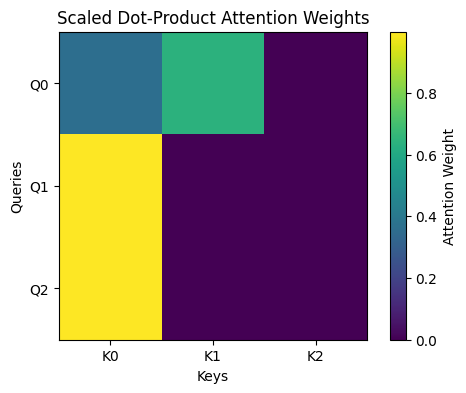

In [13]:
plt.figure(figsize=(6,4))
plt.imshow(attention_weights, cmap='viridis')
plt.colorbar(label='Attention Weight')
plt.title('Scaled Dot-Product Attention Weights')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.xticks(ticks=range(K.shape[0]), labels=[f'K{i}' for i in range(K.shape[0])])
plt.yticks(ticks=range(Q.shape[0]), labels=[f'Q{i}' for i in range(Q.shape[0])])
plt.show()
